<h1 style="color:#1a8cff;"><center>Lending Club Case Study</center></h1>

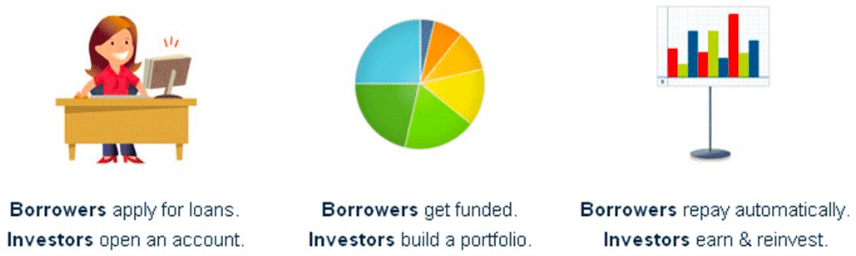
### Problem Statement:
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company



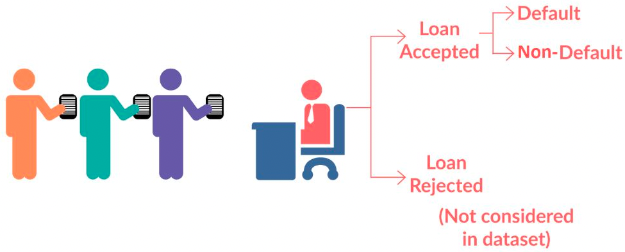
### 4 major parts covered in this case study:
1. Data Understanding
2. Data Cleaning (cleaning missing values, removing redundant columns etc.) 
3. Data Analysis
4. Recommendations

In [3676]:
#Import the relevant libraries and IGNORE the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# 1. Data Understanding

In [3677]:
#Read the dataset, check the shape of the dataframe and display first 10 rows
loan_df = pd.read_csv('loan.csv')
print("\nNumber of Rows & Columns: ", loan_df.shape)
loan_df.head(10)


Number of Rows & Columns:  (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Comment:
**Loan** dataframe contains __111 features__ and __39717 records__
(Out of which **74** features are *float64*, **13** features are *integer*, and **24** features are *object* datatype respectively)

In [3678]:
# Exploring the feature/column names in the dataframe
list(loan_df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

# 2. Data Cleaning

In [3679]:
#Check the datatypes of all the columns of the dataframe
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [3680]:
#Check the count of columns having NULL values
null_cols_count = len(loan_df.columns) - loan_df.notnull().any().sum()
print("Total number of columns having NO/NULL values:", null_cols_count)

#Check the count of columns with missing values
missing_val_cols_count = len(loan_df.columns[loan_df.isnull().any()]) - null_cols_count
print("Total number of columns having missing values:", missing_val_cols_count)

#Columns with NULL and missing values
missing_col_names = loan_df.columns[loan_df.isnull().any()]
print(missing_col_names)

Total number of columns having NO/NULL values: 54
Total number of columns having missing values: 14
Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recen

#### Comment:
Following observations are evident from the above information: Total number of missing columns = **68**
1. **54** columns/features are having *NULL/Missing* values --> These columns can be deleted
2. **14** columns/features have missing values 
3. Important feature: **emp_length** has missing values --> Need to impute them

### 2.1 Checking the percentage of missing values in columns

In [3681]:
#Checking the percentage of values in each column
dict(loan_df.isnull().sum()/len(loan_df.index)*100)

{'id': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'emp_title': 6.191303472064859,
 'emp_length': 2.7066495455346575,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'loan_status': 0.0,
 'pymnt_plan': 0.0,
 'url': 0.0,
 'desc': 32.58050708764509,
 'purpose': 0.0,
 'title': 0.027695948838029054,
 'zip_code': 0.0,
 'addr_state': 0.0,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'earliest_cr_line': 0.0,
 'inq_last_6mths': 0.0,
 'mths_since_last_delinq': 64.66248709620565,
 'mths_since_last_record': 92.98537150338646,
 'open_acc': 0.0,
 'pub_rec': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.12589067653649572,
 'total_acc': 0.0,
 'initial_list_status': 0.0,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'total_rec_prncp': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries

In [3682]:
#Features/Columns having missing values - NOT NULL values
miss_val_cols_percent = dict(loan_df.isnull().sum()/len(loan_df.index)*100)
print("Number of columns having missing values(Other than NULL): ", len(dict({k:v for (k,v) in miss_val_cols_percent.items() if (v > 0) & (v != 100)})))

Number of columns having missing values(Other than NULL):  14


In [3683]:
#Features/Columns having missing values > 0 & NOT EQUAL to 100
dict({k:v for (k,v) in miss_val_cols_percent.items() if (v > 0) & (v != 100)})

{'emp_title': 6.191303472064859,
 'emp_length': 2.7066495455346575,
 'desc': 32.58050708764509,
 'title': 0.027695948838029054,
 'mths_since_last_delinq': 64.66248709620565,
 'mths_since_last_record': 92.98537150338646,
 'revol_util': 0.12589067653649572,
 'last_pymnt_d': 0.1787647606818239,
 'next_pymnt_d': 97.12969257496789,
 'last_credit_pull_d': 0.0050356270614598285,
 'collections_12_mths_ex_med': 0.1409975577208752,
 'chargeoff_within_12_mths': 0.1409975577208752,
 'pub_rec_bankruptcies': 1.7549160309187504,
 'tax_liens': 0.09819472769846666}

In [3684]:
#Features/Columns having missing values > 30% and < 60%
dict({k:v for (k,v) in miss_val_cols_percent.items() if (v >= 30) & (v < 60) & (v != 100)})

{'desc': 32.58050708764509}

In [3685]:
#Features/Columns having missing values > 60% and < 90%
dict({k:v for (k,v) in miss_val_cols_percent.items() if (v >= 60) & (v < 90) & (v != 100)})

{'mths_since_last_delinq': 64.66248709620565}

In [3686]:
#Features/Columns having missing values > 90%
dict({k:v for (k,v) in miss_val_cols_percent.items() if v >= 90})

{'mths_since_last_record': 92.98537150338646,
 'next_pymnt_d': 97.12969257496789,
 'mths_since_last_major_derog': 100.0,
 'annual_inc_joint': 100.0,
 'dti_joint': 100.0,
 'verification_status_joint': 100.0,
 'tot_coll_amt': 100.0,
 'tot_cur_bal': 100.0,
 'open_acc_6m': 100.0,
 'open_il_6m': 100.0,
 'open_il_12m': 100.0,
 'open_il_24m': 100.0,
 'mths_since_rcnt_il': 100.0,
 'total_bal_il': 100.0,
 'il_util': 100.0,
 'open_rv_12m': 100.0,
 'open_rv_24m': 100.0,
 'max_bal_bc': 100.0,
 'all_util': 100.0,
 'total_rev_hi_lim': 100.0,
 'inq_fi': 100.0,
 'total_cu_tl': 100.0,
 'inq_last_12m': 100.0,
 'acc_open_past_24mths': 100.0,
 'avg_cur_bal': 100.0,
 'bc_open_to_buy': 100.0,
 'bc_util': 100.0,
 'mo_sin_old_il_acct': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_rcnt_rev_tl_op': 100.0,
 'mo_sin_rcnt_tl': 100.0,
 'mort_acc': 100.0,
 'mths_since_recent_bc': 100.0,
 'mths_since_recent_bc_dlq': 100.0,
 'mths_since_recent_inq': 100.0,
 'mths_since_recent_revol_delinq': 100.0,
 'num_accts_ever_

In [3687]:
#Total percentage of missing columns
round((len(dict({k:v for (k,v) in miss_val_cols_percent.items() if v > 0})) * 100) / len(loan_df.columns), 2)

61.26

#### Comment:
Following observations can be made from the above metrics:
1. Total percentage of missing columns (Both NULL & NOT NULL) = **61.26%**<br>
    Out of these *14* columns, there is only feature (*desc*) which has >30% & <60% missing values (*NOT NULL*), there is only one feature (*mths_since_last_delinq*) which has >60% & <90% missing values (*NOT NULL*) and *only 2* features (*mths_since_last_record & next_pymnt_d*) who have more than >90% & <100% missing values (*NOT NULL*)
2. *54* columns/features have 100% missing values (NULL)
3. *emp_length* has **2.7%** missing values

### 2.2 Remove all those columns with high missing percentage

In [3688]:
#List the features having more than 60% missing values
cols_to_be_del = loan_df.columns[(loan_df.isnull().sum() / len(loan_df.index) * 100) > 60]
cols_to_be_del

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [3689]:
#Deleting the columns having more than 60% missing values and check the shape
loan_df = loan_df.drop(cols_to_be_del, axis = 1)
loan_df.shape

(39717, 54)

In [3690]:
#Check 'desc' column which has 32.58% missing values
loan_df[loan_df['desc'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0,0.0,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,f,0.0,0.0,13947.989160,13947.99,12000.00,1947.99,0.0,0.0,0.0000,Sep-13,6315.30,Aug-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.50%,29,f,0.0,0.0,7471.990000,7471.99,5433.47,1393.42,0.0,645.1,6.3145,Oct-13,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
15,1069759,1304871,1000,1000,1000.0,36 months,16.29%,35.31,D,D1,Internal revenue Service,< 1 year,RENT,28000.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,641xx,MO,20.31,0,Sep-07,1,11,0,6524,81.50%,23,f,0.0,0.0,1270.716942,1270.72,1000.00,270.72,0.0,0.0,0.0000,Jan-15,36.32,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39676,88854,70699,5000,5000,225.0,36 months,7.43%,155.38,A,A2,Rail Europe Group,4 years,RENT,200000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,house,Buying a painting,100xx,NY,0.28,0,Mar-95,0,2,0,3164,13.70%,2,f,0.0,0.0,5174.194867,232.85,5000.00,174.19,0.0,0.0,0.0000,Mar-08,0.00,May-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,Self-Employeed,< 1 year,OWN,80000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,P's Family Credit Loan,537xx,WI,1.21,0,Jul-96,3,15,1,27185,16.10%,29,f,0.0,0.0,5912.052998,798.13,5000.00,912.05,0.0,0.0,0.0000,Jul-10,165.17,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,My Credit Card Loan,537xx,WI,0.31,0,Oct-97,0,7,0,216,0.60%,19,f,0.0,0.0,5593.626092,279.68,5000.00,593.63,0.0,0.0,0.0000,Jul-10,156.29,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,N

#### Comment:
**desc** is the comments provided by the loan applicant and might not be very much useful in our analysis. So, this column can be deleted

In [3691]:
#Dropping the 'desc' column
loan_df = loan_df.drop(['desc'], axis=1)
loan_df.shape

(39717, 53)

In [3692]:
#Re-Checking the percentage of values in each column
dict(loan_df.isnull().sum()/loan_df.shape[0]*100)

{'id': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'emp_title': 6.191303472064859,
 'emp_length': 2.7066495455346575,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'loan_status': 0.0,
 'pymnt_plan': 0.0,
 'url': 0.0,
 'purpose': 0.0,
 'title': 0.027695948838029054,
 'zip_code': 0.0,
 'addr_state': 0.0,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'earliest_cr_line': 0.0,
 'inq_last_6mths': 0.0,
 'open_acc': 0.0,
 'pub_rec': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.12589067653649572,
 'total_acc': 0.0,
 'initial_list_status': 0.0,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'total_rec_prncp': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries': 0.0,
 'collection_recovery_fee': 0.0,
 'last_pymnt_d': 0.1787647606818239,
 'last_pymnt_amnt': 0.0,
 'last_credit_pul

In [3693]:
#Checking only the defaulters - Storing the demographic details in a TEMPORARY dataframe for categorical analysis later
loan_temp_df = loan_df[loan_df['loan_status'] == "Charged Off"]

#Dropping few other demographic columns which is not so useful for our analysis
loan_df = loan_df.drop(['emp_title', 'title', 'zip_code', 'addr_state'], axis=1)
loan_df.shape

(39717, 49)

In [3694]:
#Re-check the count of columns with missing values
missing_val_col_count = loan_df.isnull().any().sum()
missing_val_col_count

8

#### Comment:
**Demographic** features (*emp_title, title, zip_code, addr_state*) are deleted<br>
Finally, we end up with **49** features, and out of these, *9* features has some missing values. But, for our analysis, we need not impute the data and can leave them as it is.

### 2.3 Drop rows where the missing percentage is quite high

In [3695]:
#Total number of rows containing NULL values
missing_rows_count = loan_df[loan_df.isnull().any(axis=1)].shape[0]

#Rows with missing values
missing_val_rows = loan_df[loan_df.isnull().any(axis=1)]

print('\n Missing values in rows:', missing_rows_count)
print('\n Rows:')
print(missing_val_rows)


 Missing values in rows: 1884

 Rows:
            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
26     1069800    1304679      15000        15000           8725.0   
168    1067644    1302032       2500         2500           2500.0   
323    1058717    1290516      18000        18000          18000.0   
394    1064582    1298394       4000         4000           4000.0   
422    1064366    1298164       1000         1000           1000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade emp_length  \
26      36 months   14.27%       514.64     C     

In [3696]:
#Check the count of rows having more than 9 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > missing_val_col_count])

0

#### Comment:
From the above step it is clear that there are no rows with high percentage of missing values.

# 3. Data Analysis

In [3697]:
#Let's check the information about the dataframe again
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

#### Comment:
Few important features which will help us in identifying whether the loan applicant will be a *Defaulter* or *Non-Defaulter*:
>**loan_amnt** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

>**term** - The number of payments on the loan. Values are in months and can be either 36 or 60.

>**int_rate** - Interest Rate on the loan.

>**grade** - LC assigned loan grade.

>**sub_grade** - LC assigned loan subgrade.

>**emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

>**home_ownership** - The home ownership status provided by the borrower during registration.

>**annual_inc** - The self-reported annual income provided by the borrower during registration.

>**verification_status** - Indicates if income was verified by LC, not verified, or if the income source was verified.

>**issue_d** - The month which the loan was funded.

>**purpose** - A category provided by the borrower for the loan request. 

>**dti** - *Debt-To-Income* is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

<h3>The target feature/column is <span style="color:Green;"><b>loan_status</b></span></h3>

<h3 align="center">Customer Behaviour Columns</h3><br>
<b>The customer behaviour features are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.</b> 
Therefore, the following columns can be safely discarded from the analysis:
<span style="color: red;"><br>delinq_2yrs<br>earliest_cr_line<br>inq_last_6mths<br>open_acc<br>pub_rec<br>revol_bal<br>revol_util<br>total_acc
<br>out_prncp<br>out_prncp_inv<br>total_pymnt<br>total_pymnt_inv<br>total_rec_prncp<br>total_rec_int<br>total_rec_late_fee<br>recoveries<br>collection_recovery_fee<br>last_pymnt_d<br>last_pymnt_amnt<br>last_credit_pull_d<br>application_type</span>

In [3698]:
#Dropping the customer behavior columns
loan_df = loan_df.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                        'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type'], axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

#### Comment:
From the above information we can observe that there are few columns viz., *term, int_rate* and *emp_length* which should have been numeric in nature, but, it's data type is object. Let's investigate these in detail in the coming steps.

#### Handling Incorrect Data Types 

In [3699]:
loan_df[['term', 'int_rate', 'emp_length']]

,term,int_rate,emp_length
0,36 months,10.65%,10+ years
1,60 months,15.27%,< 1 year
2,36 months,15.96%,10+ years
3,36 months,13.49%,10+ years
4,60 months,12.69%,1 year
...,...,...,...
39712,36 months,8.07%,4 years
39713,36 months,10.28%,3 years
39714,36 months,8.07%,< 1 year
39715,36 months,7.43%,< 1 year


In [3700]:
#Checking the unique values present in term feature
loan_df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [3701]:
#Correcting the 'term' column data type to int
loan_df['term'] = loan_df['term'].str.strip().apply(lambda x : x.split(' ')[0]).astype('int')

In [3702]:
#Correcting the 'int_rate' column
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : x.split('%')[0]).astype('float')

In [3703]:
#Correcting the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [3704]:
#Verifying the Data type of 3 columns: term, int_rate & emp_length
loan_df[['term', 'int_rate', 'emp_length']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   term        39717 non-null  int64  
 1   int_rate    39717 non-null  float64
 2   emp_length  38642 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 931.0 KB


#### Handling NULL values in emp_length 

In [3705]:
#Replace n/a values with 0
loan_df['emp_length'] = loan_df['emp_length'].fillna(0)

#Check if there is any missing values
loan_df['emp_length'].isnull().sum()

0

#### Comment:
In the above steps, we converted the data type of following columns to a numeric type:<br> 
**term** - Removed the string *months*<br>
**int_rate** - Removed the symbol *%*<br>
**emp_length** - Extracted only the number by removing symbols and string and *n/a* values were imputed with 0

### Analysis of  <span style="color:Green;">loan_status</span> feature

In [3706]:
#Check the values
print(loan_df['loan_status'].head(10))
loan_df['loan_status'].value_counts()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Comment: 
The ones marked 'Current' are neither fully paid not defaulted, so, we'll get rid of the *Current* loans.<br> 
Also, we'll tag the other two values as **1(Charged Off)** or **0(Fully Paid)** to make the analysis simple and clean.

In [3707]:
#Remove the rows having 'Current' loans
loan_df = loan_df[(loan_df['loan_status'] == 'Fully Paid') | (loan_df['loan_status'] == 'Charged Off')]
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [3708]:
#Replace the loan_status values: Fully Paid -> 0 Charged Off -> 1
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x : 1 if x == 'Charged Off' else 0)
loan_df['loan_status'].head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int64

In [3709]:
#Re-check the count of Full Paid(1's) & Charged Off(0's) values
loan_df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [3710]:
#Re-check the data type of the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  int64  
 6   int_rate                    38577 non-null  float64
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_length                  38577 non-null  float64
 11  home_ownership              38577 non-null  object 
 12  annual_inc                  38577 non-null  float64
 13  verification_status         385

#### Comment: 
The two emp_lenght values are replaced as **1 -> Charged Off** (Defaulters) and **0 -> Fully Paid** (Non-Defaulters)<br>
Total number of records: **38577** (Defaulters -> 5627 + Non-Defaulters -> 32950) after excluding the *Current* loans (1140 records)

## 3.1 Univariate Analysis

In [3711]:
#Check the Defaulters v/s Non Defaulters percentage
defaulters = round(loan_df['loan_status'].describe()['mean'], 3) * 100
non_defaulters = 100 - defaulters

print("Defaulters = ",defaulters,"%")
print("Non-Defaulters = ",non_defaulters,"%")

Defaulters =  14.6 %
Non-Defaulters =  85.4 %


In [3712]:
#Deriving 2 new columns: Month & Year from issue_d
temp_date = pd.to_datetime(loan_df['issue_d'].apply(lambda x: dt.strptime(x, '%b-%y')))
loan_df['issue_year'] = pd.to_datetime(temp_date).dt.year
loan_df['issue_month'] = pd.to_datetime(temp_date).dt.month
loan_df[['issue_year', 'issue_month']]

,issue_year,issue_month
0,2011,12
1,2011,12
2,2011,12
3,2011,12
5,2011,12
...,...,...
39712,2007,7
39713,2007,7
39714,2007,7
39715,2007,7


In [3713]:
#Display the shape
loan_df.shape

(38577, 30)

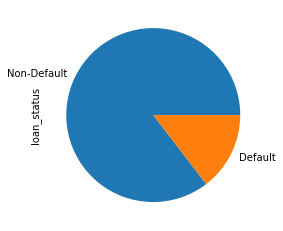

In [3714]:
#Plotting a pie chart to show the Default v/s Non-default
temp_loan_status = loan_df['loan_status'].apply(lambda x : "Default" if x == 1 else "Non-Default")
temp_loan_status.value_counts().plot.pie()
plt.show()

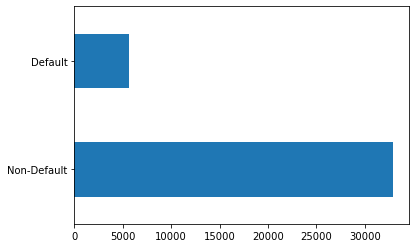

In [3715]:
#Plotting a horizontal bar chart to show the Default v/s Non-default
temp_loan_status.value_counts().plot.barh()
plt.show()

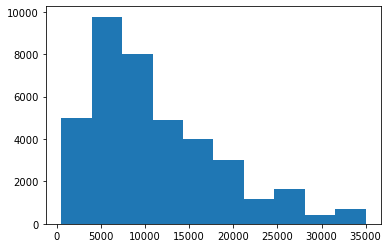

In [3716]:
#Histogram to check the spread of loan amount
plt.hist(loan_df['loan_amnt'])
plt.show()

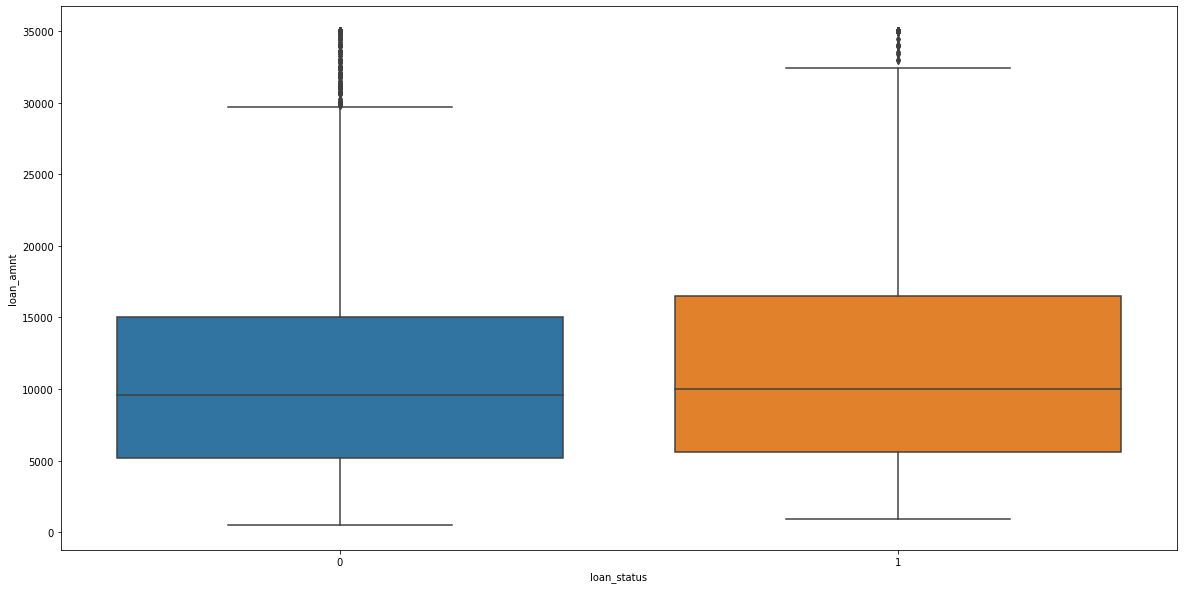

In [3717]:
#Boxplot to check the influence of loan_amnt on loan_status
plt.figure(figsize=(20, 10))
sns.boxplot(data=loan_df, x='loan_status', y='loan_amnt' )
plt.show()

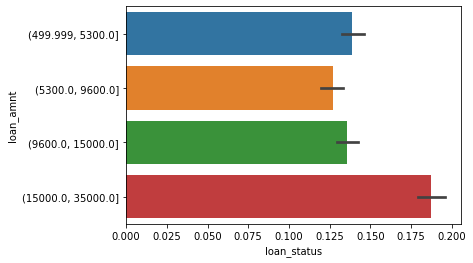

In [3718]:
#Plotting a horizontal bar chart to check the influence of loan amount on loan_status
loan_amnt = pd.qcut(loan_df['loan_amnt'], 4)
sns.barplot(data=loan_df, x='loan_status', y=loan_amnt )
plt.show()

#### Comment: 
Default rate is high when loan amount is in the range of **(15000, 35000)**

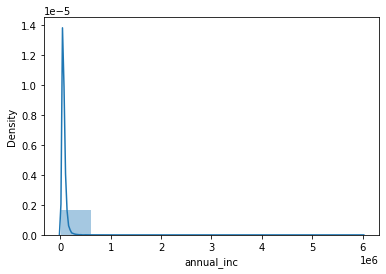

In [3719]:
#Distribution plot to check the spread of annual income
sns.distplot(loan_df['annual_inc'], bins=10)
plt.show()

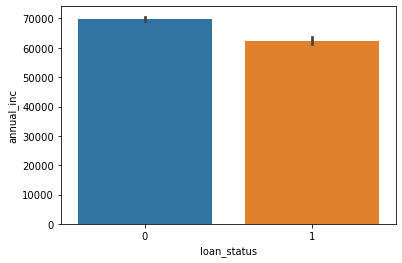

In [3720]:
#Plotting a bar chart to check the influence of annual_inc on loan_status
sns.barplot(data=loan_df, x='loan_status', y='annual_inc' )
plt.show()

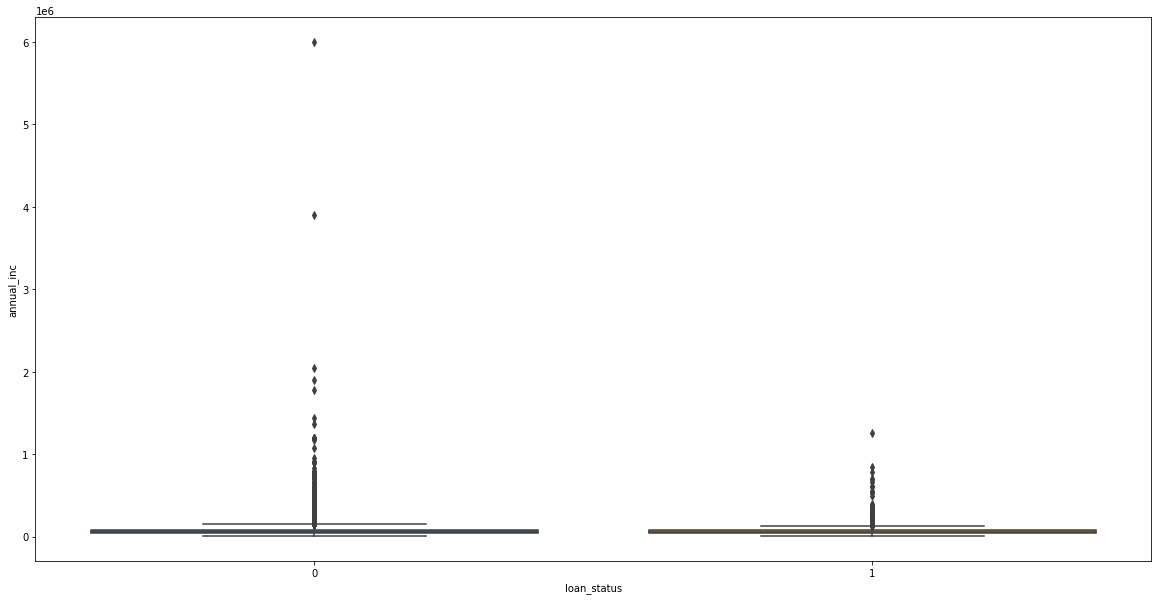

In [3721]:
#Boxplot to check the influence of annual_inc on loan_status
plt.figure(figsize=(20, 10))
sns.boxplot(data=loan_df, x='loan_status', y='annual_inc')
plt.show()

#### Comment: 
Annual income is not a big differentiating factor

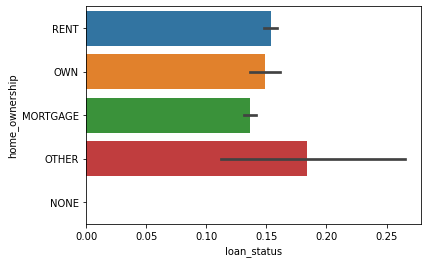

In [3722]:
#Plotting a horizontal bar chart to check the influence of home_ownership on loan_status
sns.barplot(data=loan_df, x='loan_status', y='home_ownership' )
plt.show()

#### Comment: 
Default rate is high in home ownership of type **Others**

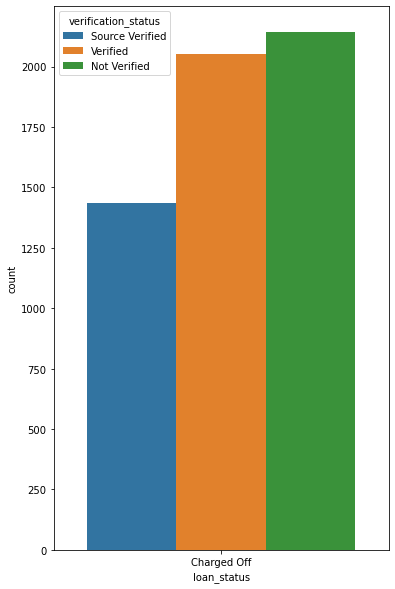

In [3723]:
#Plotting a count plot to check the influence of verification_status on defaulters
plt.figure(figsize=(6, 10))
sns.countplot(data=loan_temp_df, x='loan_status', hue='verification_status')
plt.show()

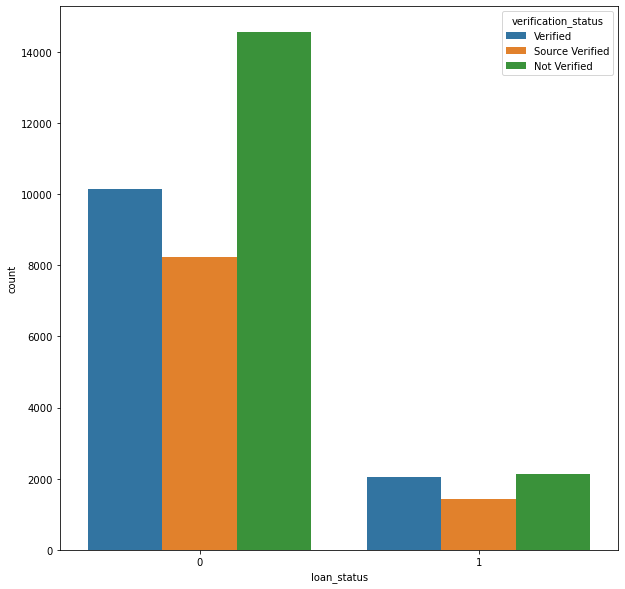

In [3724]:
#Plotting a count plot to check the influence of verification_status on defaulter v/s non-defaulters
plt.figure(figsize=(10, 10))
sns.countplot(data=loan_df, x='loan_status', hue='verification_status')
plt.show()

#### Comment: 
**Not Verified** loans have high chances of being Default

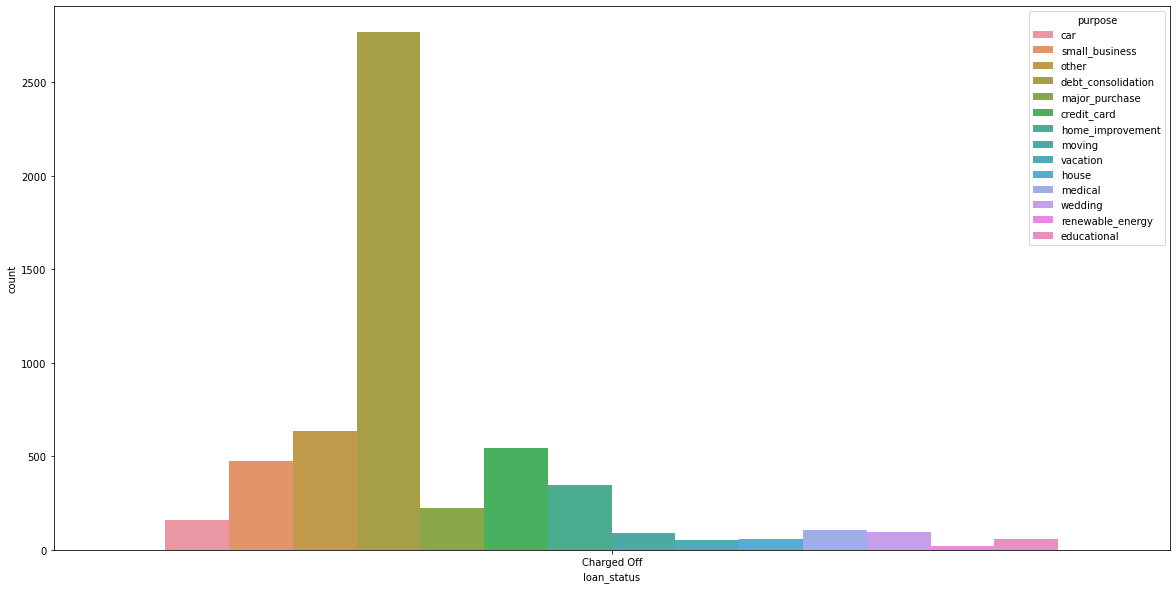

In [3725]:
#Plotting a count plot to check the influence of purpose on loan_status
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_temp_df, x='loan_status', hue='purpose')
plt.show()

#### Comment: 
Default rate is high when loan is availed for **Debt consolidation** purpose

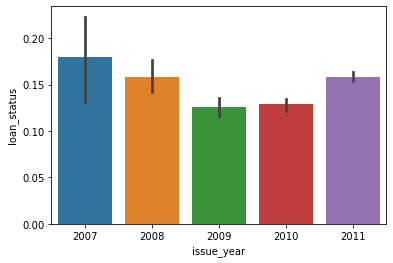

In [3726]:
#Plotting a bar chart to check the year when max. no. of loans were availed
sns.barplot(data=loan_df, x='issue_year', y='loan_status')
plt.show()

#### Comment: 
Loans availed in the year **2007** have maximun default rate

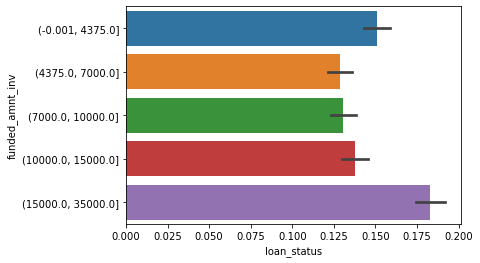

In [3727]:
#Plotting a horizontal bar chart to check the influence of investor funded amount on loan_status
funded_amnt_inv = pd.qcut(loan_df['funded_amnt_inv'], 5)
sns.barplot(data=loan_df, x='loan_status', y=funded_amnt_inv )
plt.show()

#### Comment: 
Default rate is high when investor invests the amount in the range of **(15000, 35000)**

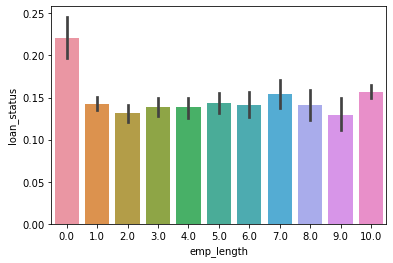

In [3728]:
#Plotting a bar chart to check the influence of emp_length on loan_status
sns.barplot(data=loan_df, x='emp_length', y='loan_status')
plt.show()

#### Comment: 
Loan applicants whose employee length is *n/a* (**0**) have high chances of getting defaulted

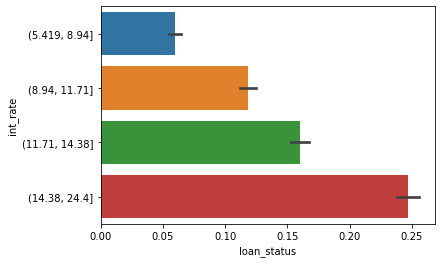

In [3729]:
#Plotting a horizontal bar chart to check the influence of int_rate on loan_status
int_rate = pd.qcut(loan_df['int_rate'], 4)
sns.barplot(data=loan_df, x='loan_status', y=int_rate )
plt.show()

#### Comment: 
Default rate is high when loans have a interest rate of more than **14%**

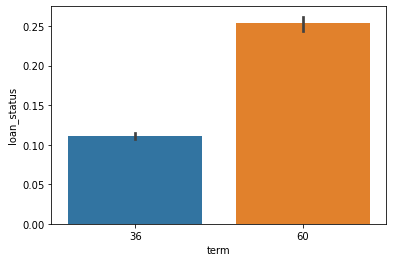

In [3730]:
#Plotting a bar chart to check the influence of term on loan_status
sns.barplot(data=loan_df, x='term', y='loan_status' )
plt.show()

#### Comment: 
Default rate is high when loan term is **>36 months**

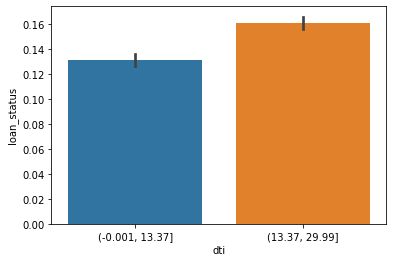

In [3731]:
#Plotting a bar chart to check the influence of dti on loan_status
dti = pd.qcut(loan_df['dti'], 2)
sns.barplot(data=loan_df, x=dti, y='loan_status' )
plt.show()

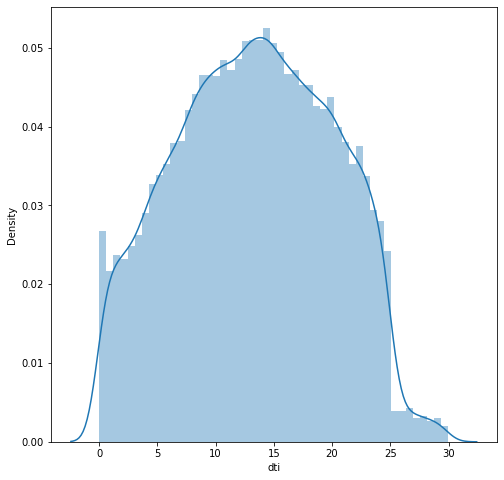

In [3732]:
#Checking the distribution of dti
plt.figure(figsize=(8,8))
sns.distplot(loan_df['dti'])
plt.show()

#### Comment: 
Default rate is high when *dti* is in the range of **(13, 25)**

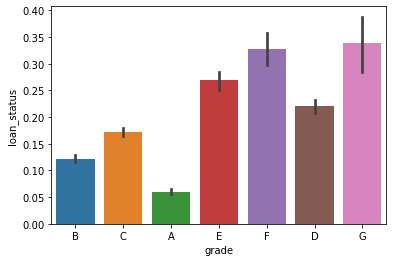

In [3733]:
#Plotting a bar chart to check the influence of grade on loan_status
sns.barplot(data=loan_df, x='grade', y='loan_status' )
plt.show()

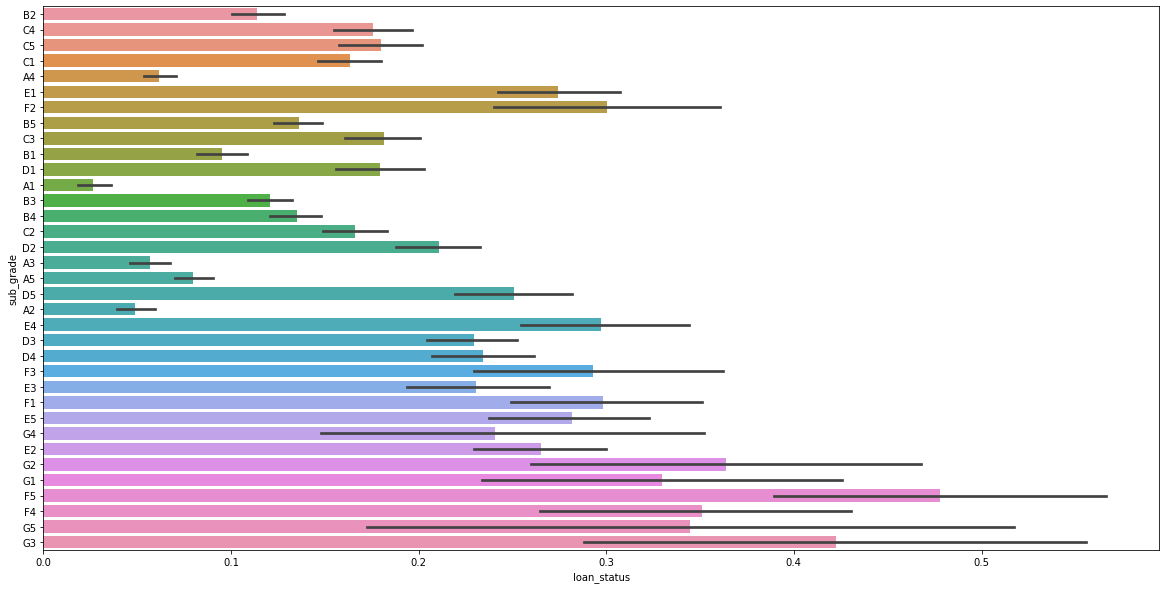

In [3734]:
#Plotting a horizontal bar chart to check the influence of sub-grade on loan_status
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_df, x='loan_status', y='sub_grade' )
plt.show()

#### Comment: 
Default rate is high in the grades belonging to **F** and **G** having sub-grades **F5** and **G3** respectively

## 3.2 Segmented Univariate Analysis
### We'll use the following categorical features to do bivariate analysis:
1. grade
2. sub_grade
3. home_ownership
4. verification_status
5. purpose

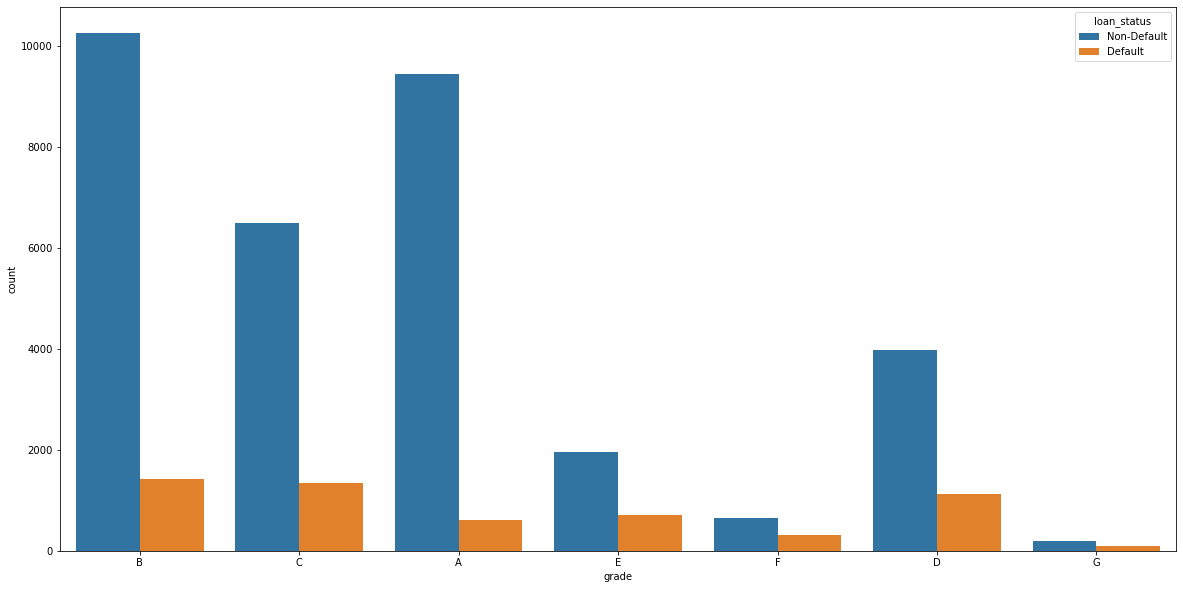

In [3735]:
#Get the unique count of grades and compare with loan_status
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_df, x='grade', hue=temp_loan_status)
plt.show()

In [3736]:
#Checking the max. defaulter category in grade
(loan_df.groupby('grade')['loan_status'].sum()/loan_df['grade'].value_counts() * 100).idxmax()

'G'

#### Comment:
Default rate is high for grade **G**

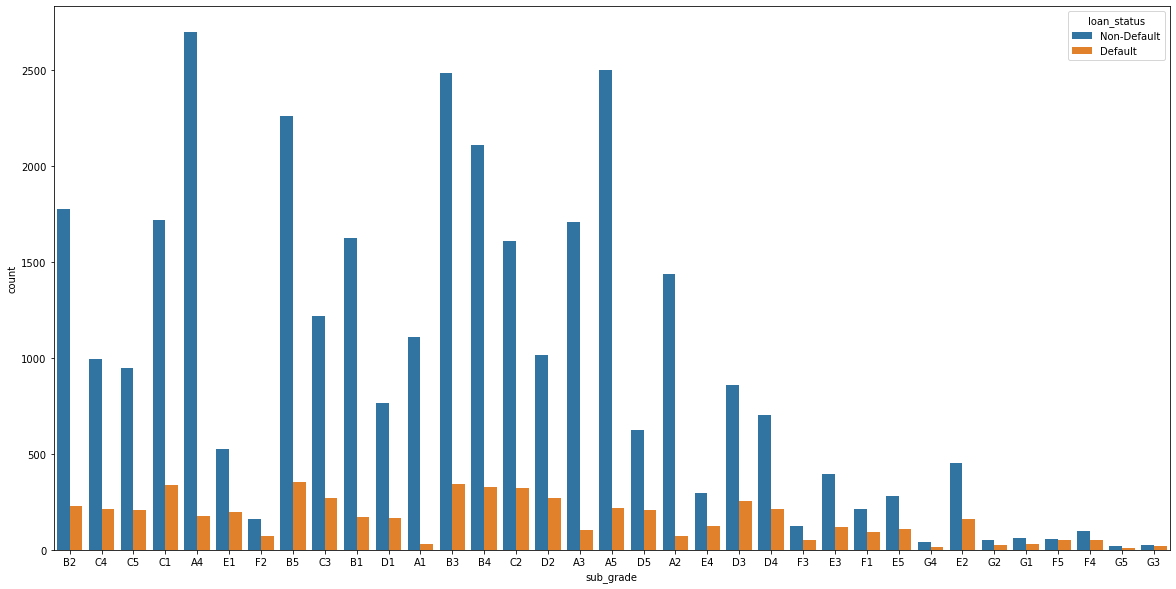

In [3737]:
#Get the unique count of sub-grades and compare with loan_status
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_df, x='sub_grade', hue=temp_loan_status)
plt.show()

In [3738]:
#Checking the max. defaulter category in sub_grade
(loan_df.groupby('sub_grade')['loan_status'].sum()/loan_df['sub_grade'].value_counts() * 100).idxmax()

'F5'

#### Comment:
Default rate is high for sub-grades **F5**

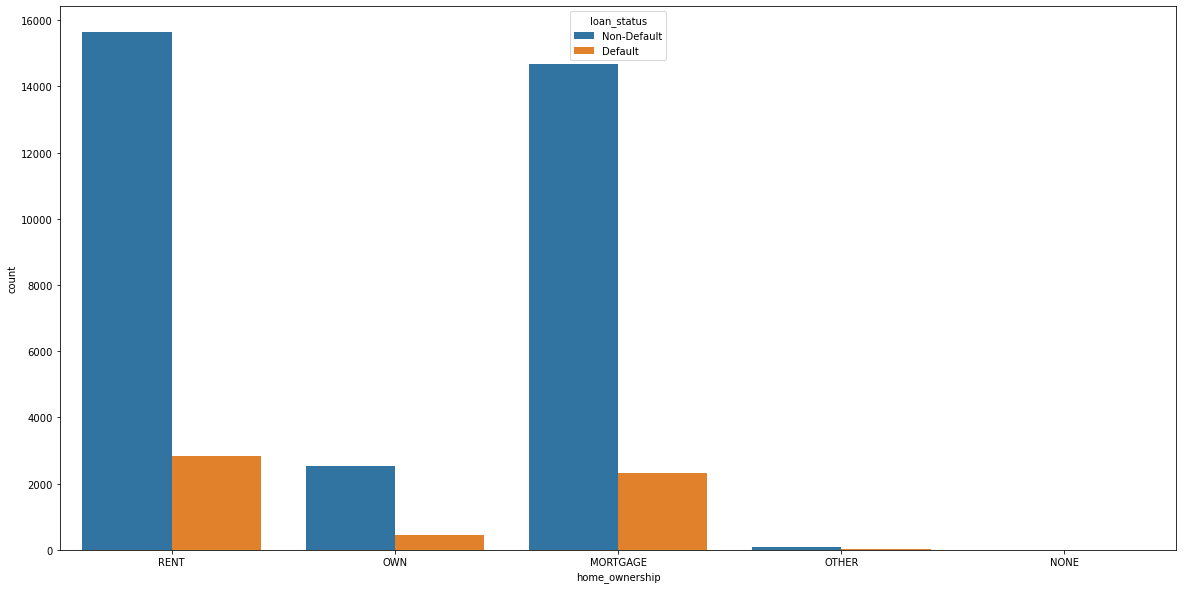

In [3739]:
#Get the unique count of home_ownership and compare with loan_status
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_df, x='home_ownership', hue=temp_loan_status)
plt.show()

In [3740]:
#Checking the max. defaulter category in home_ownership
(loan_df.groupby('home_ownership')['loan_status'].sum()/loan_df['home_ownership'].value_counts() * 100).idxmax()

'OTHER'

#### Comment:
Default rate is high for **OTHER** category in home_ownership

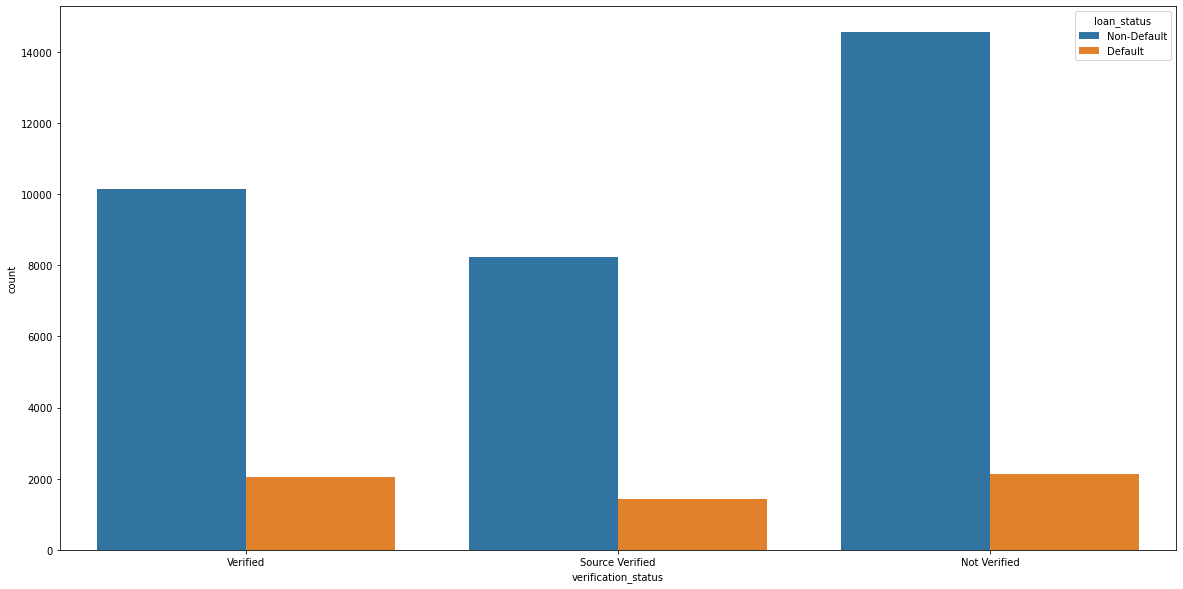

In [3741]:
#Get the unique count of verification_status and compare with loan_status
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_df, x= 'verification_status', hue=temp_loan_status)
plt.show()

#### Comment:
Default rate is high for **Not Verified** category in verification_status

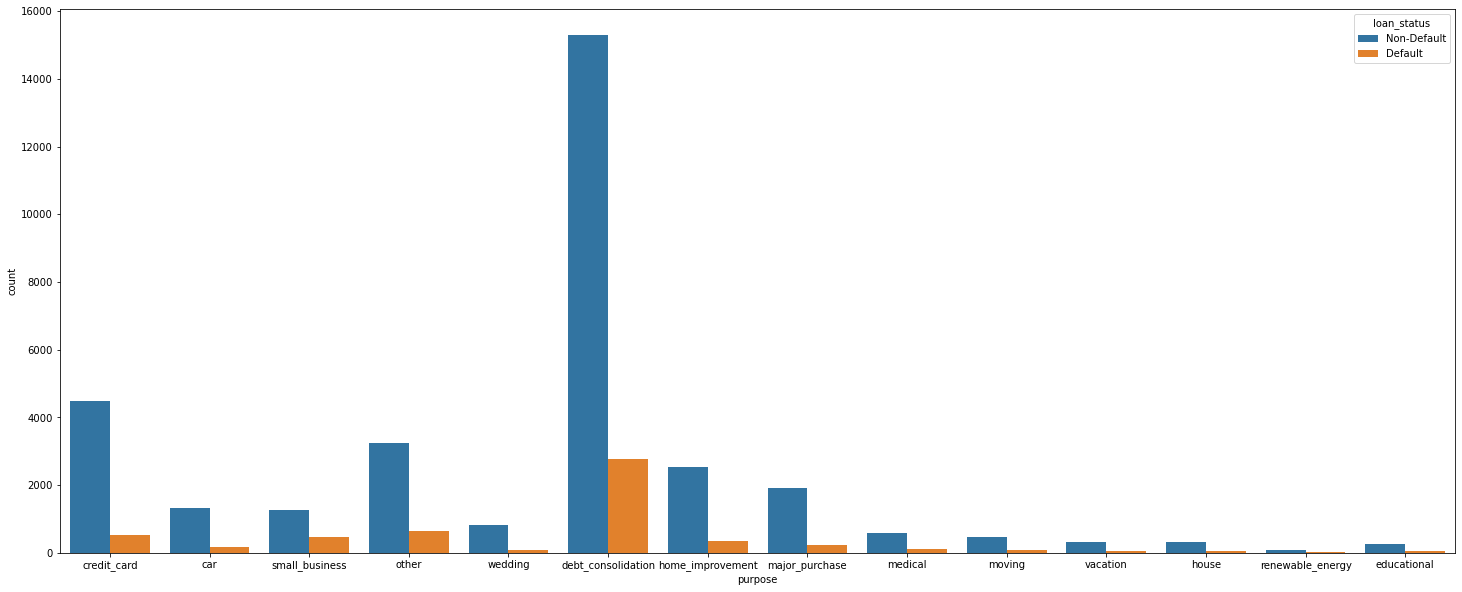

In [3760]:
#Get the unique count of purpose and compare with loan_status among defaulters v/s non-defaulters
plt.figure(figsize=(25, 10))
sns.countplot(data=loan_df, x='purpose', hue=temp_loan_status)
plt.show()

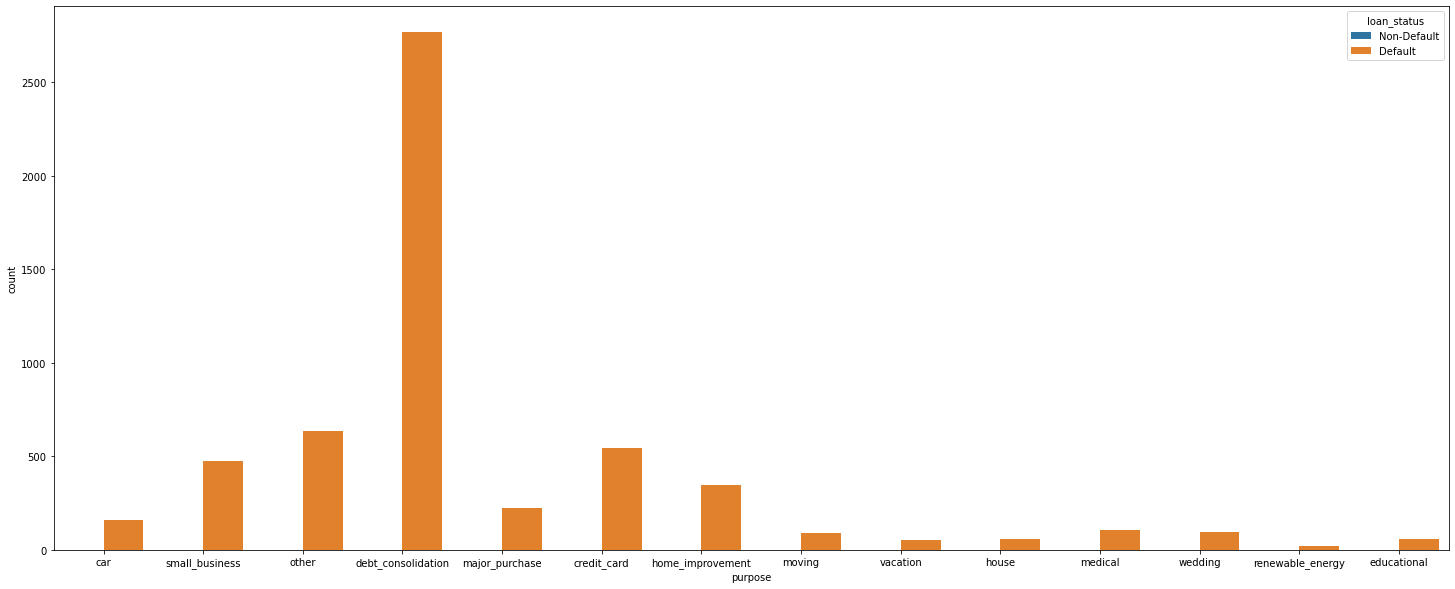

In [3761]:
#Get the count of defaulters in each category of purpose
plt.figure(figsize=(25, 10))
sns.countplot(data=loan_temp_df, x='purpose', hue=temp_loan_status)
plt.show()

#### Comment:
Default rate is high for **debt_consolidation** category

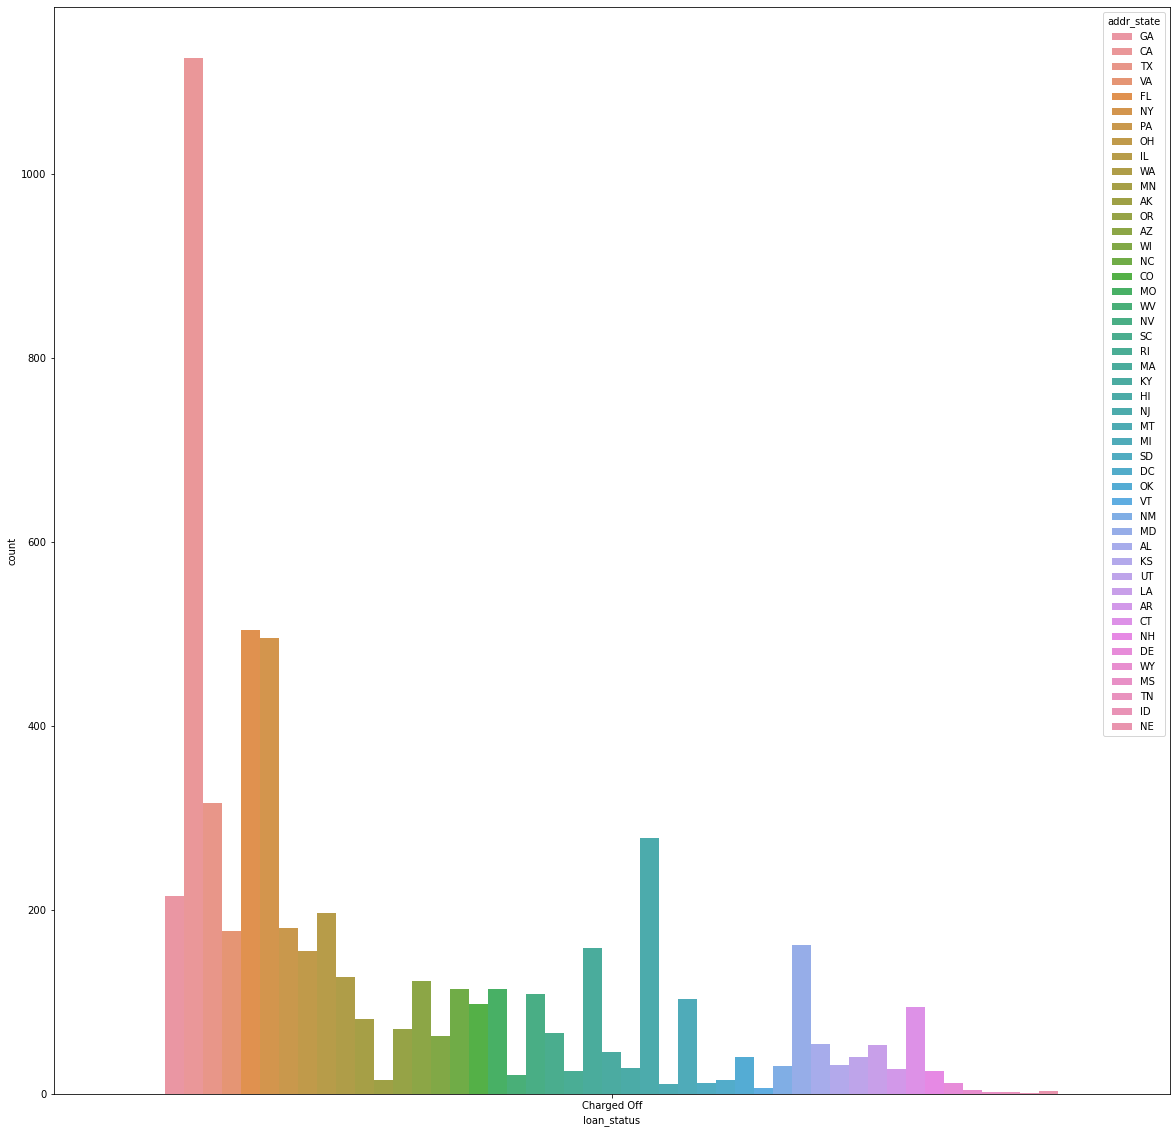

In [3745]:
#Plotting to check the highest defaulters among different states
plt.figure(figsize=(20, 20))
sns.countplot(data=loan_temp_df, x='loan_status', hue='addr_state')
plt.show()

#### Comment:
Default rate is very high in **CA** (California) state

## 3.3 Bivariate Analysis

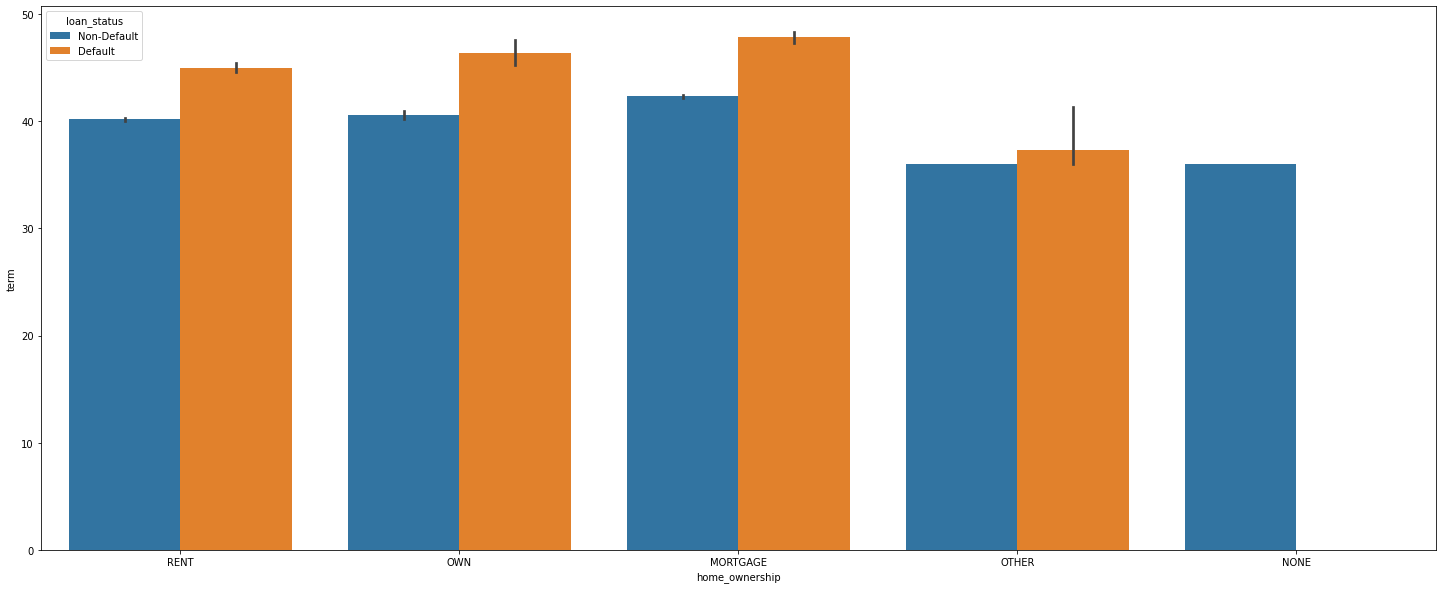

In [3746]:
#Plotting a bar chart to check the influence of home_ownership & term on loan_status
plt.figure(figsize=(25, 10))
sns.barplot(data=loan_df, x='home_ownership', y='term', hue=temp_loan_status)
plt.show()

In [3747]:
#Checking the max. defaulter category across home_ownership and term
loan_df.groupby(['home_ownership', 'term'])['loan_status'].value_counts()/loan_df.groupby(['home_ownership', 'term'])['loan_status'].count() * 100

home_ownership  term  loan_status
MORTGAGE        36    0               90.160793
                      1                9.839207
                60    0               77.162216
                      1               22.837784
NONE            36    0              100.000000
OTHER           36    0               82.474227
                      1               17.525773
                60    1              100.000000
OWN             36    0               89.048240
                      1               10.951760
                60    0               71.661721
                      1               28.338279
RENT            36    0               87.904982
                      1               12.095018
                60    0               71.964097
                      1               28.035903
Name: loan_status, dtype: float64

#### Comment:
Default percentage is high if term is **more than 36 months** across following categories of home_ownership:
1. OTHER    --> 100%
1. OWN      --> 28.34%
2. RENT     --> 28.04%
3. MORTGAGE --> 22.84% 

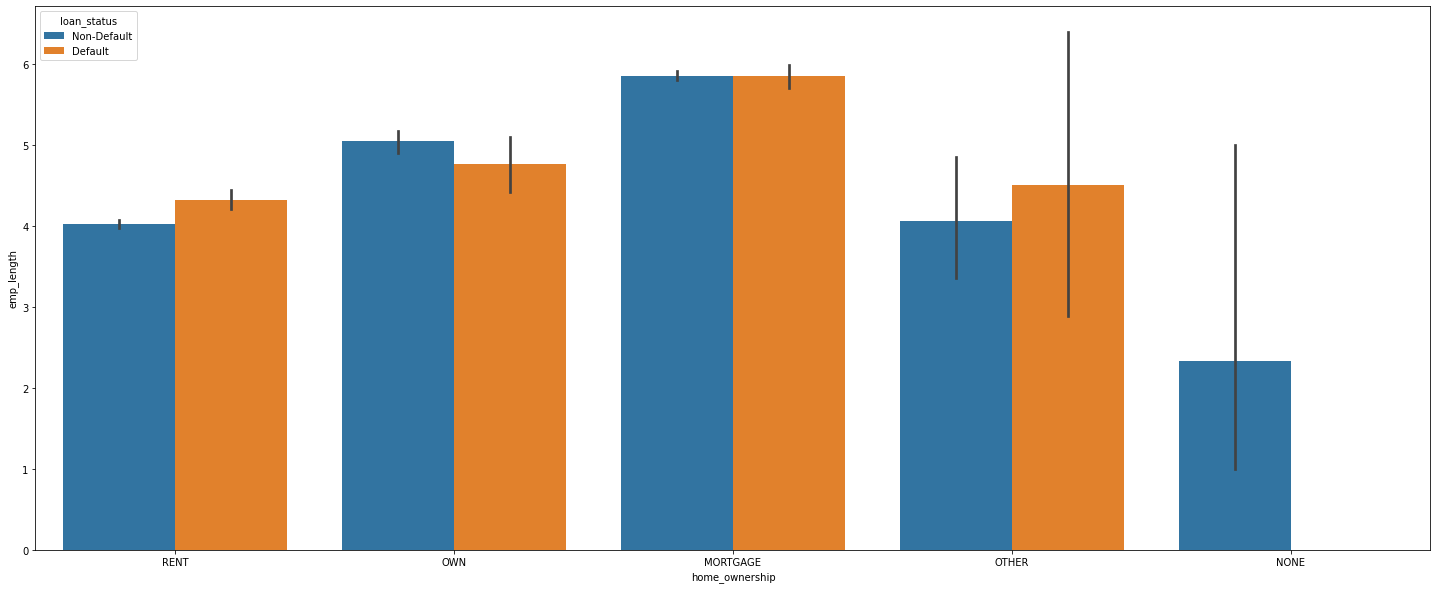

In [3748]:
#Plotting a bar chart to check the influence of home_ownership & emp_length on loan_status
plt.figure(figsize=(25, 10))
sns.barplot(data=loan_df, x='home_ownership', y='emp_length', hue=temp_loan_status)
plt.show()

#### Comment:
Maximum defaulters are found in **OTHER** category of home_ownership whose emp_length is **more than 4 years**

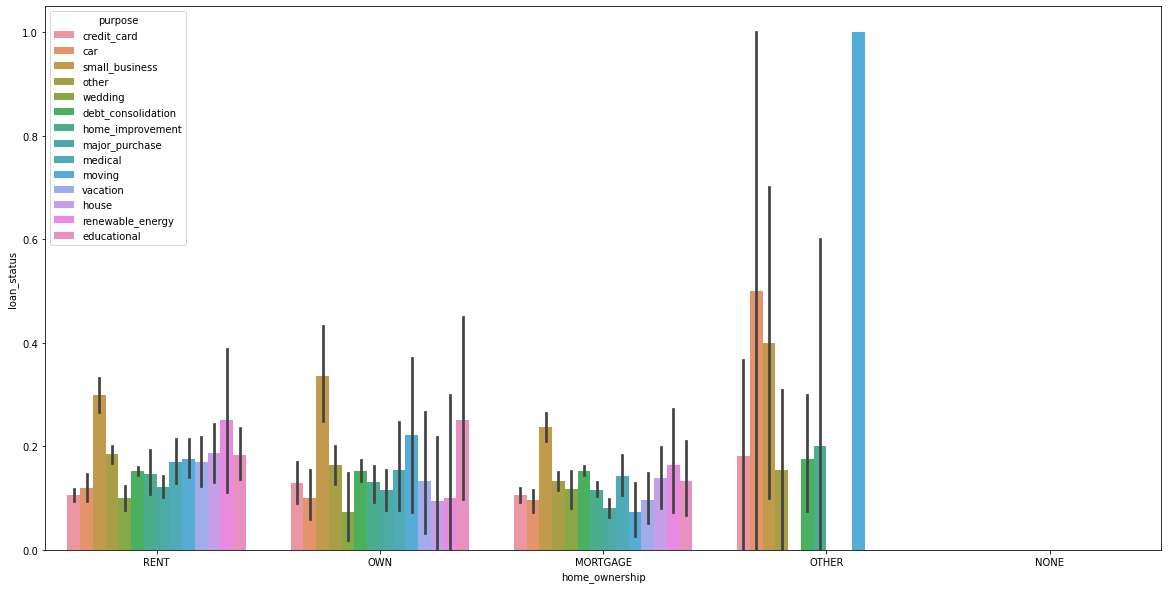

In [3749]:
#Plotting a bar chart to check the influence of home_ownership & purpose on loan_status
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_df, x='home_ownership', y='loan_status', hue='purpose')
plt.show()

#### Comment:
Default percentage is high for the following combinations of home_ownership category and purpose:
1. MORTAGE * small_business --> 23.83%
2. OTHER * moving           --> 100%
3. OWN * small_business     --> 33.66%
4. RENT * small_business    --> 29.92% 

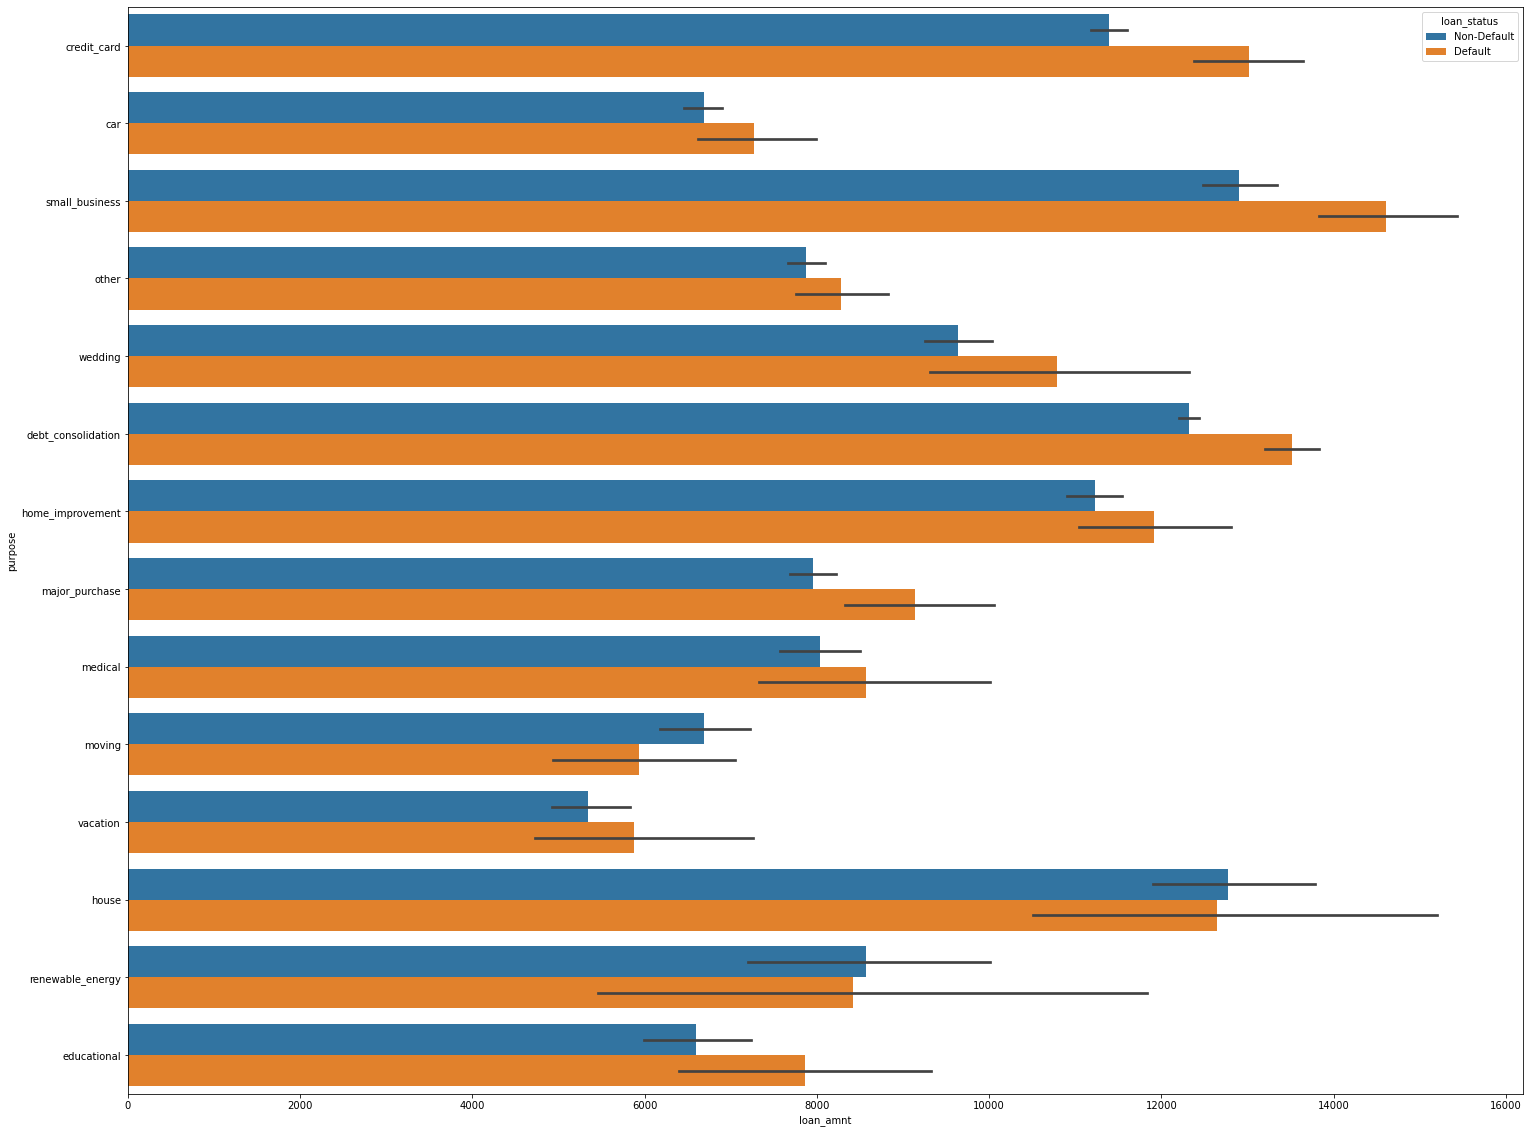

In [3750]:
#Plotting a bar chart to check the influence of loan_amnt & purpose on loan_status
plt.figure(figsize=(25, 20))
sns.barplot(data=loan_df, x='loan_amnt', y='purpose', hue=temp_loan_status)
plt.show()

#### Comment:
Default percentage is higher when loan_amnt issued is higher (>10000) for small_business purpose

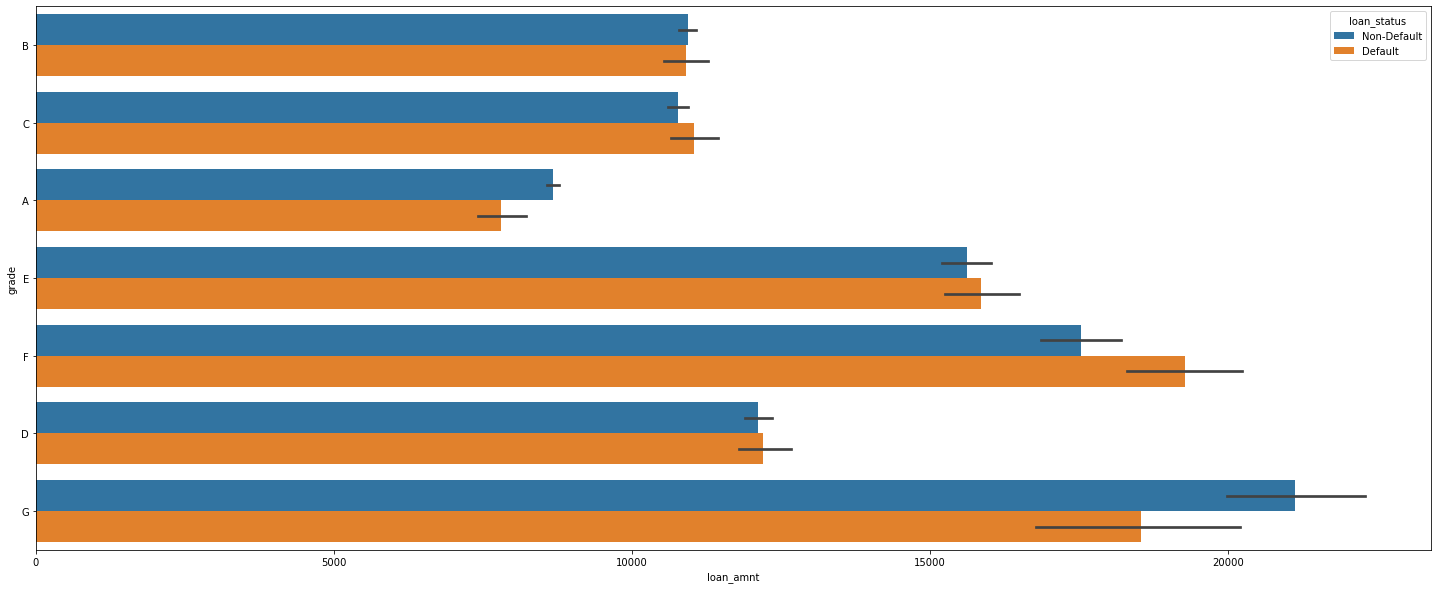

In [3751]:
#Plotting a bar chart to check the influence of loan_amnt & grade on loan_status
plt.figure(figsize=(25, 10))
sns.barplot(data=loan_df, x='loan_amnt', y='grade', hue=temp_loan_status)
plt.show()

#### Comment:
Default percentage is 45.1% for grade F when loan_amnt is greater than 15000

## 3.4 Multivariate Analysis

In [3752]:
#Checking the correlation of few non-categorical features
correlation_df = loan_df[['term', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'emp_length']]
corr_df = correlation_df.corr()
corr_df

,term,loan_amnt,int_rate,installment,annual_inc,emp_length
term,1.000000,0.346650,0.440206,0.090456,0.043866,0.102642
loan_amnt,0.346650,1.000000,0.301265,0.932260,0.268999,0.156259
int_rate,0.440206,0.301265,1.000000,0.277203,0.048899,0.011440
installment,0.090456,0.932260,0.277203,1.000000,0.267842,0.131151
annual_inc,0.043866,0.268999,0.048899,0.267842,1.000000,0.121229
emp_length,0.102642,0.156259,0.011440,0.131151,0.121229,1.000000


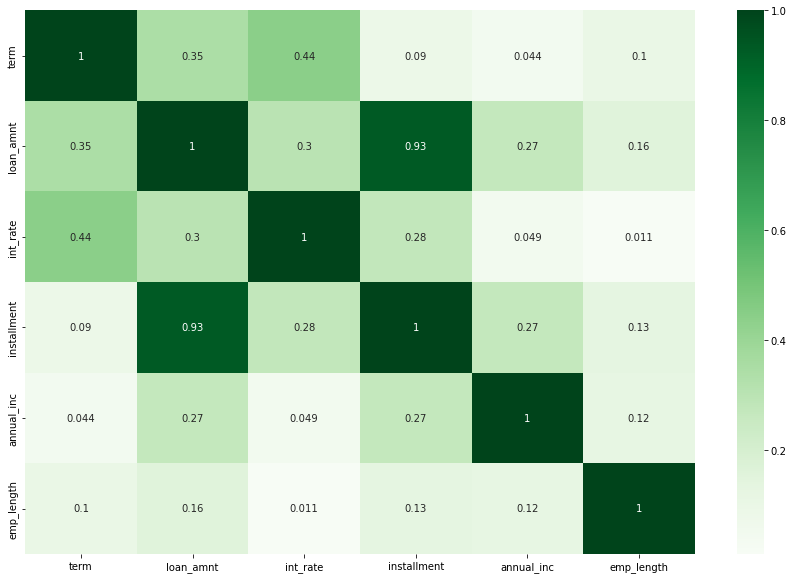

In [3753]:
#Plot the correlation of features on a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_df, cmap="Greens", annot=True)
plt.show()

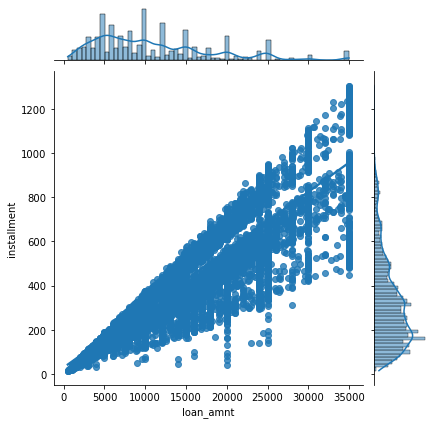

In [3754]:
#Plotting to check the trend of loan_amnt v/s installment
sns.jointplot(data=loan_df, x='loan_amnt',y='installment', kind="reg")
plt.show()

#### Comment:
From the heatmap and regression plot, it is very clear that there is a high correlation between loan_amnt and installment (**0.93**) i.e., as the loan maount increases, the installment also increases.

## 4. Recommendations

Features which are highly influencing the Default v/s Non-Default loans are as follows:
> <span style="color:Green;">Loan amount</span>

> <span style="color:Green;">Term</span>

> <span style="color:Green;">Grade</span>

> <span style="color:Green;">Home Ownership</span>

> <span style="color:Green;">Purpose</span>

> <span style="color:Green;">Verification status</span>

<b>Points to consider before approving the loan:<b>

    1. Default rate is high when loan amount is in the range of (15000, 35000)
    2. Not Verified loans have high chances of being Default
    3. Default rate is high when loan is availed for Debt consolidation purpose
    4. Default rate is high when investor invests the amount in the range of (15000, 35000)
    5. Default rate is high when loans have a interest rate of more than 14% and loan term is >36 months
    6. Default rate is high in the grades belonging to F and G
    7. Maximum defaulters are found in OTHER category of home_ownership whose emp_length is more than 4 years
    8. Default percentage is higher when loan_amnt issued is higher (>10000) for small_business purpose
